In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['host_total_listings_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['host_total_listings_count'].max()
Min = Mexico['host_total_listings_count'].min()
Limites = [Min, Max]
Limites

[1.0, 550.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

549.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

34.991262678126425

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 550, 16)
intervalos

array([  1. ,  37.6,  74.2, 110.8, 147.4, 184. , 220.6, 257.2, 293.8,
       330.4, 367. , 403.6, 440.2, 476.8, 513.4, 550. ])

In [10]:
# Creamos las categorías
categorias = [
    "Anuncio único",
    "Poco experimentado",
    "Anuncio limitado",
    "Anuncio básico",
    "Anuncio estándar",
    "Anuncio amplio",
    "Anuncio avanzado",
    "Anuncio variado",
    "Anuncio considerable",
    "Anuncio destacado",
    "Anuncio con varios tipos",
    "Anuncio frecuente",
    "Anuncios muy variados",
    "Anuncios sobresalientes",
    "Anuncios múltiples"
]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['host_total_listings_count'] = pd.cut ( x = Mexico ['host_total_listings_count'], bins = intervalos, labels = categorias )
Mexico['host_total_listings_count']

0                    NaN
1          Anuncio único
2          Anuncio único
3          Anuncio único
4          Anuncio único
              ...       
26577    Anuncio variado
26578      Anuncio único
26579      Anuncio único
26580      Anuncio único
26581      Anuncio único
Name: host_total_listings_count, Length: 26582, dtype: category
Categories (15, object): ['Anuncio único' < 'Poco experimentado' < 'Anuncio limitado' < 'Anuncio básico' ... 'Anuncio frecuente' < 'Anuncios muy variados' < 'Anuncios sobresalientes' < 'Anuncios múltiples']

In [12]:
table1 = freq_tbl(Mexico['host_total_listings_count'])
table1

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Anuncio único,18007,0.677413,0.836601
1,Poco experimentado,1537,0.057821,0.908010
2,Anuncio limitado,790,0.029719,0.944713
3,Anuncio básico,322,0.012113,0.959673
4,Anuncio variado,298,0.011211,0.973518
5,Anuncio avanzado,197,0.007411,0.982671
6,Anuncio amplio,194,0.007298,0.991684
7,Anuncios muy variados,109,0.004101,0.996748
8,Anuncio estándar,36,0.001354,0.998420
9,Anuncio destacado,26,0.000978,0.999628


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_total_listings_count,frequency
0,Anuncio único,18007
1,Poco experimentado,1537
2,Anuncio limitado,790
3,Anuncio básico,322
4,Anuncio variado,298
5,Anuncio avanzado,197
6,Anuncio amplio,194
7,Anuncios muy variados,109
8,Anuncio estándar,36
9,Anuncio destacado,26


In [14]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] >= 26]
Filtro

,host_total_listings_count,frequency
0,Anuncio único,18007
1,Poco experimentado,1537
2,Anuncio limitado,790
3,Anuncio básico,322
4,Anuncio variado,298
5,Anuncio avanzado,197
6,Anuncio amplio,194
7,Anuncios muy variados,109
8,Anuncio estándar,36
9,Anuncio destacado,26


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('host_total_listings_count')
Filtro_index

,frequency
host_total_listings_count,
Anuncio único,18007
Poco experimentado,1537
Anuncio limitado,790
Anuncio básico,322
Anuncio variado,298
Anuncio avanzado,197
Anuncio amplio,194
Anuncios muy variados,109
Anuncio estándar,36


<Axes: xlabel='host_total_listings_count'>

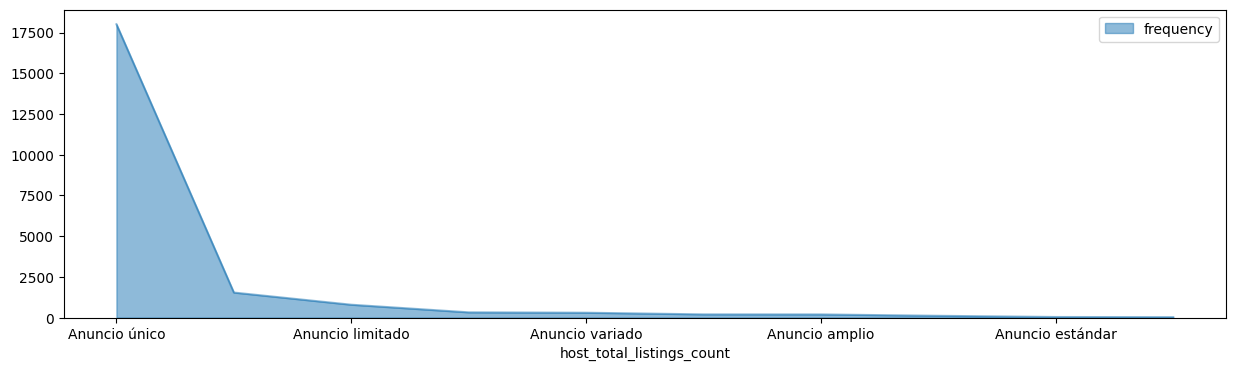

In [17]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)